### Workspace Layouts:

- this workspace has an explicit root at albatross, with two libraries (bird-feeder and seeds) in the packages directory
- if seeds was excluded in the pyproject.toml, the workspace has two members total: albatross (the root) and bird-feeder

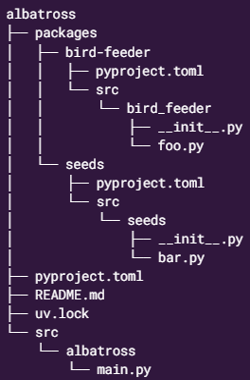

In [4]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/workspace4.png')
new_image = img.resize((250, 380))
display(new_image)

When to use Workspace Layouts:

- Workspaces are intended to facilitate the development of multiple interconnected packages within a single repository. 
- As a codebase grows in complexity, it can be helpful to split it into smaller, composable packages, each with their own dependencies and version constraints.
- Workspaces help enforce isolation and separation of concerns. 
- For example, in uv, we have separate packages for the core library and the command-line interface, enabling us to test the core library independently of the CLI, and vice versa

When workspace is not suitable:

- Workspaces are not suited for cases in which members have conflicting requirements, or desire a separate virtual environment for each member. 
- In this case, path dependencies are often preferable. 
- For example, rather than grouping albatross and its members in a workspace, you can always define each package as its own independent project, with inter-package dependencies defined as path dependencies in ```tool.uv.sources```

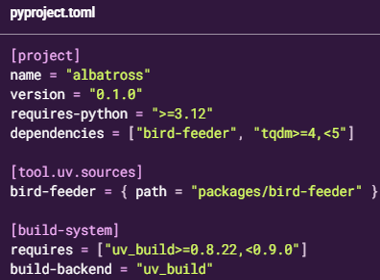

In [11]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/workspace5.png')
new_image = img.resize((380, 280))
display(new_image)

Note:

- This approach conveys many of the same benefits, but allows for more fine-grained control over dependency resolution and virtual environment management 
- the downside is that uv run --package is no longer available; instead, commands must be run from the relevant package directory
- uv's workspaces enforce a single requires-python for the entire workspace, taking the intersection of all members' requires-python values. 
- If you need to support testing a given member on a Python version that isn't supported by the rest of the workspace, you may need to use uv pip to install that member in a separate virtual environment